In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Trips_2018.csv')

In [4]:
# Dropping unnamed column
data.drop(["Unnamed: 0"], axis=1, inplace=True)

# BA Project

## 1 Introduction and Data Analysis

## 1.1 Introduction
Fylde-tekst

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed euismod, nisl eget aliquam ultricies, nunc nisl aliquet nunc, eget aliquam nisl nisl quis nunc.

In [5]:
print(f"Size of the dataset: {data.shape}")
data.head()

Size of the dataset: (17548339, 13)


,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


Above we can see that the dataset has a total of 17548339 and 13 features. Each row is a unique trip and we therefore have 17548339 trips in total. Each trip starts at a certain station and ends at a certain station. The trip duration is the time it takes to get from the start station to the end station. The start and end station is represented by a station id. The start and end station also has a name and a latitude and longitude. We can find the total number of stations and the amount of trips started from that station:

### Station analysis

In [6]:
start_station_data = data['start_station_id'].value_counts().reset_index()
end_station_data = data['end_station_id'].value_counts().reset_index()

print(f"""There are a total of {len(start_station_data)} stations - with ID's starting at {int(min(data['start_station_id']))} and ending at {int(max(data['start_station_id']))}. 
Each starting station has a total trip count varying from a minimum of {min(start_station_data['count'])} trip to a maxiumum of {max(start_station_data['count'])} trips. 

The counts of the end stations is quite similar, with a minimum of {min(end_station_data['count'])} trip to a maxiumum of {max(end_station_data['count'])} trips. 

With means and std of

Start stations: 
Mean: {start_station_data['count'].mean()}
STD:  {start_station_data['count'].std()}

End stations: 
Mean: {end_station_data['count'].mean()}
STD:  {end_station_data['count'].std()}""")

There are a total of 818 stations - with ID's starting at 72 and ending at 3721. 
Each starting station has a total trip count varying from a minimum of 1 trip to a maxiumum of 150257 trips. 

The counts of the end stations is quite similar, with a minimum of 1 trip to a maxiumum of 149932 trips. 

With means and std of

Start stations: 
Mean: 21449.684596577015
STD:  20476.063749210218

End stations: 
Mean: 20642.16705882353
STD:  20665.909393672104


In [7]:
# Top 10 most used start stations and their counts
data['start_station_id'].value_counts().reset_index()[:10]

,start_station_id,count
0,519.0,150257
1,497.0,108883
2,435.0,107165
3,402.0,105605
4,426.0,94466
5,285.0,93370
6,477.0,87956
7,490.0,85293
8,499.0,84963
9,293.0,83025


In [8]:
# Top 10 most used end stations and their counts
data['end_station_id'].value_counts().reset_index()[:10]

,end_station_id,count
0,519.0,149932
1,497.0,113336
2,402.0,109147
3,435.0,108636
4,426.0,99423
5,285.0,93590
6,477.0,88141
7,490.0,85290
8,514.0,85143
9,293.0,84123


The start- and end-stations are quite symmetric, as the most popular start-stations are also among the most popular end-stations.
Plotting the count on top of each other below reveals the same. 

Text(0.5, 1.0, 'Trip counts per station')

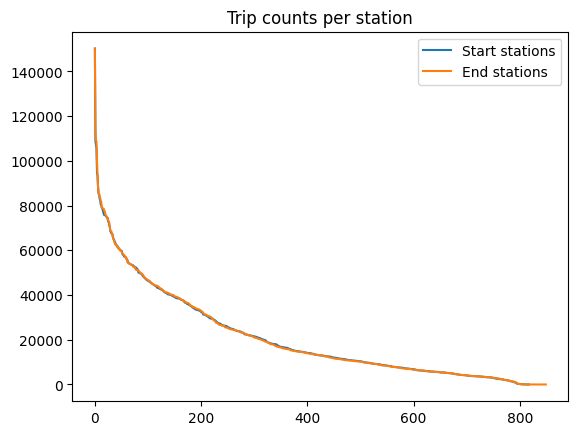

In [9]:
data['start_station_id'].value_counts().reset_index()['count'].plot(legend=True)
data['end_station_id'].value_counts().reset_index()['count'].plot(legend=True)
plt.legend(['Start stations', 'End stations'])
plt.title("Trip counts per station")

Plotting a histogram of the station ID's, it's revealed that stations 0-500 and 3000-3700 contain much more data than any stations in between - most of which don't contain any data at all.

array([[<Axes: title={'center': 'start_station_id'}>,
        <Axes: title={'center': 'end_station_id'}>]], dtype=object)

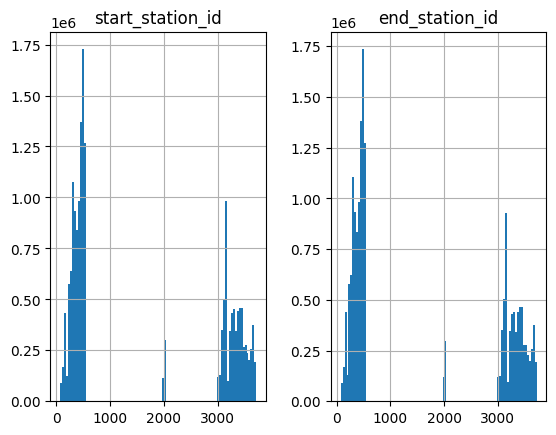

In [10]:
data.hist(column=['start_station_id', 'end_station_id'], bins = 100, )

### Bike analysis
We can also see which bikes are used the most:

In [11]:
bike_data = data['bikeid'].value_counts().reset_index()

print(f"""There are a total of {len(bike_data)} bikes - with ID's starting at {int(min(data['bikeid']))} and ending at {int(max(data['bikeid']))}. 
Each bike has a total trip count varying from a minimum of {min(bike_data['count'])} trip to a maxiumum of {max(bike_data['count'])} trips. 
With a mean and std of \n
Mean: {bike_data['count'].mean()}
STD:  {bike_data['count'].std()}""")



There are a total of 15244 bikes - with ID's starting at 14529 and ending at 35831. 
Each bike has a total trip count varying from a minimum of 1 trip to a maxiumum of 2862 trips. 
With a mean and std of 

Mean: 1151.163670952506
STD:  555.2274977636148


In [12]:
# Top 10 most used bikes and their counts
data['bikeid'].value_counts().reset_index()[:10]

,bikeid,count
0,30657,2862
1,32124,2728
2,32090,2707
3,32036,2692
4,32541,2681
5,32195,2627
6,32606,2593
7,30692,2584
8,31108,2576
9,30315,2570


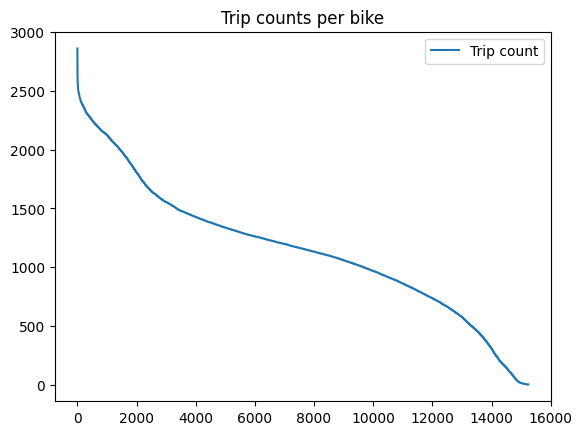

In [13]:
data['bikeid'].value_counts().reset_index()['count'].plot(legend=True, title='Trip counts per bike')
plt.legend(['Trip count'])

array([[<Axes: title={'center': 'bikeid'}>]], dtype=object)

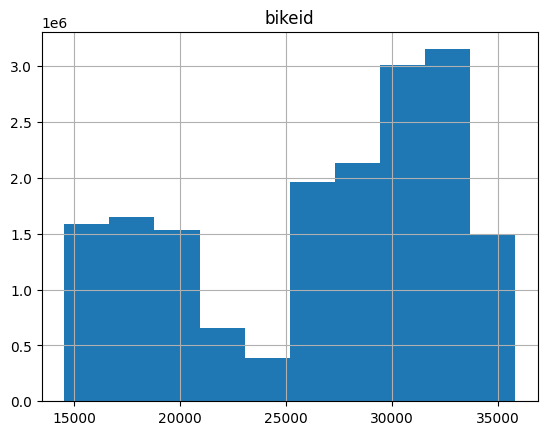

In [14]:
data.hist(column=['bikeid'])

### Trip Durations - (and outlier analysis)

The distribution of the duration of the trips is shown below:

In [15]:
# TODO: ER DET SEKUNDER? 

print(f"""Each trip varied in length from a minimum of {min(data['tripduration'])} seconds to a maxiumum of {max(data['tripduration'])} seconds ({max(data['tripduration']) / 60 / 60 / 24} days). 
With a mean, median and std of \n
Mean: {data['tripduration'].mean()}
Median: {data['tripduration'].median()}
STD:  {data['tripduration'].std()}""")


Each trip varied in length from a minimum of 61 seconds to a maxiumum of 19510049 seconds (225.81075231481483 days). 
With a mean, median and std of 

Mean: 988.7431977465218
Median: 605.0
STD:  18895.83771470003


Based on the summary statistics, it is noted that the maximum is much much larger than both the mean and the median. Thus, it's likely that we have a few outlier trips, that are much much longer than the rest. Converting the maximum trip-duration into days reveals that the trip lasted for 225 days - clearly an outlier. 

Plotting the histogram, reveals that the trip durations is a very right-skewed distribution. 
Therefore, the logarithm is applied to ease the visualization. 

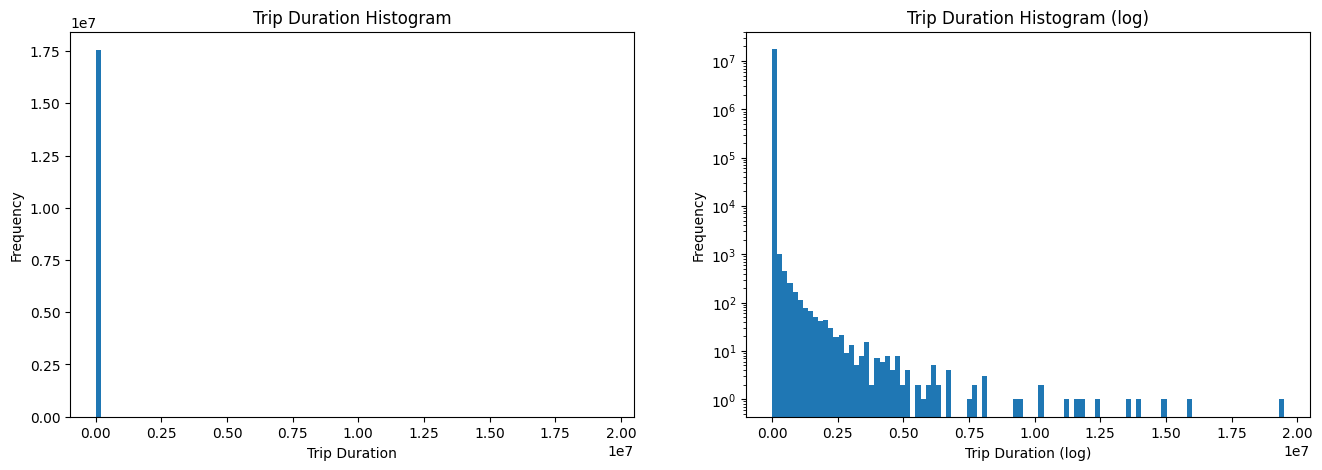

In [16]:
plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.hist(data['tripduration'], bins=100)
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.title('Trip Duration Histogram')

plt.subplot(122)
plt.hist(data['tripduration'], bins=100, log=True)
plt.xlabel('Trip Duration (log)')
plt.ylabel('Frequency')
plt.title('Trip Duration Histogram (log)')
plt.show()

Based on the histograms and summary statistics, it's clear that some of these data points are outliers. 

We decide to remove any data-point with trip durations lasting longer than the 99th percentilee, by deeming them as outliers 

TODO: CHANGE THIS TO BE BASED ON WHAT WAS DEEMED OUTLIERS

In [17]:
# Outlier if trip lasts more than a day
# data_outliers_removed = data[data['tripduration'] < 1*24*60*60]

# OR: remove if larger than third quartile:
# data_outliers_removed = data[data.tripduration < data.tripduration.quantile(0.75)]

# OR: remove if larger than 99th percentile
data_outliers_removed = data[data.tripduration < data.tripduration.quantile(0.99)]

print(f"Outliers removed from dataset: {len(data) - len(data_outliers_removed)}\n")

print(f"""Having removed the outliers, we once again do summary statistics: 
Each trip varied in length from a minimum of {min(data_outliers_removed['tripduration'])} seconds to a maxiumum of {max(data_outliers_removed['tripduration'])} seconds ({max(data_outliers_removed['tripduration']) / 60 / 60 / 24} days). 
With a mean, median and std of \n
Mean: {data_outliers_removed['tripduration'].mean()}
Median: {data_outliers_removed['tripduration'].median()}
STD:  {data_outliers_removed['tripduration'].std()}""")


Outliers removed from dataset: 175529

Having removed the outliers, we once again do summary statistics: 
Each trip varied in length from a minimum of 61 seconds to a maxiumum of 3506 seconds (0.0405787037037037 days). 
With a mean, median and std of 

Mean: 776.696752338856
Median: 599.0
STD:  576.1109481282737


Plotting the histogram reveals that the trip durations is still very right-skewed. 
The logarithm however, is no longer needed. 

Text(0.5, 1.0, 'Trip Duration Histogram')

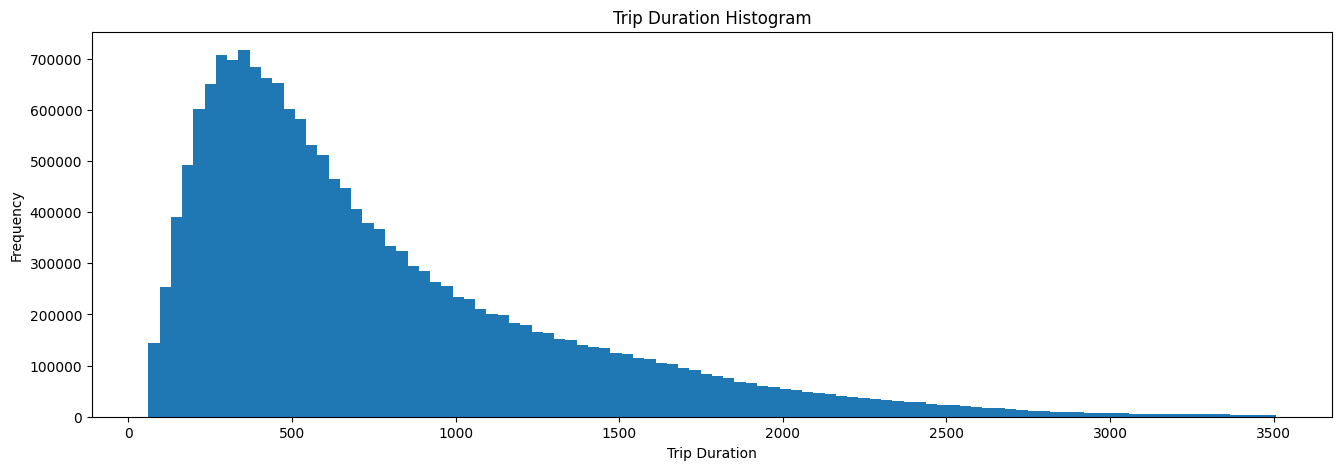

In [18]:
plt.figure(figsize=(16, 5))
plt.hist(data_outliers_removed['tripduration'], bins=100)
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.title('Trip Duration Histogram')

## 2 Predictive Challenge

For the prediction challenge, you are expected to predict the demand for the bike-sharing
system (number of dropoffs and pickups). You should do the predictions for clusters of
stations. This challenge consists of three tasks:

1. Cluster the stations spatially (nearby departing stations should be grouped together)
in no less than 20 clusters. Tasks 2 and 3 will be based on the results of this
clustering, and analysis should be performed on at least one cluster (e.g., the one
with the largest demand). More is preferable.

In order to do the clustering based on the stations, we start by finding each distinct station based on the station ID's. 

In [32]:
# Distinct stations and their latitude / longitude
data_clustering = data_outliers_removed.copy()
data_clustering = data_clustering.drop_duplicates('start_station_id')[['start_station_id', 'start_station_latitude', 'start_station_longitude']]
data_clustering.columns = [['station_id', 'latitude', 'longitude']]
data_clustering



,station_id,latitude,longitude
0,72.0,40.767272,-73.993929
1324,79.0,40.719116,-74.006667
2430,82.0,40.711174,-74.000165
2866,83.0,40.683826,-73.976323
3551,119.0,40.696089,-73.978034
...,...,...,...
15959160,3716.0,40.753599,-73.937956
16704713,3718.0,40.727464,-73.979504
16819783,3719.0,40.683223,-73.973812
17041049,3721.0,40.767549,-73.920933


We plot the location of the stations through a scatter plot

Text(0.5, 1.0, 'Location of stations')

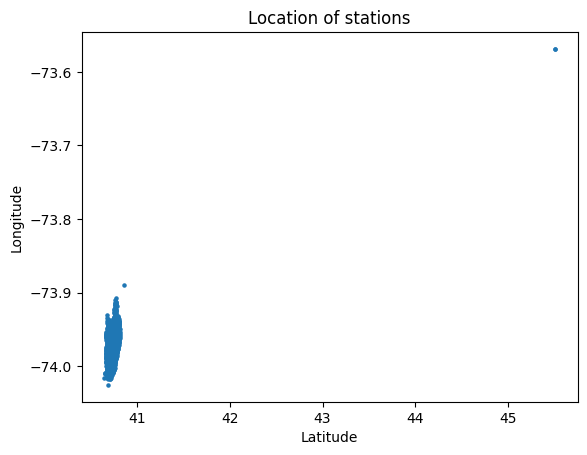

In [20]:
plt.scatter(data_clustering['latitude'], data_clustering['longitude'], s=5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("Location of stations")

A single station is located much further from than the rest, while the rest seems to be forming a single cluster when viewing the plot at this scale.

Zooming in on the cluster will hopefully make more clusters  apparent.

Text(0.5, 1.0, 'Location of stations (zoomed in)')

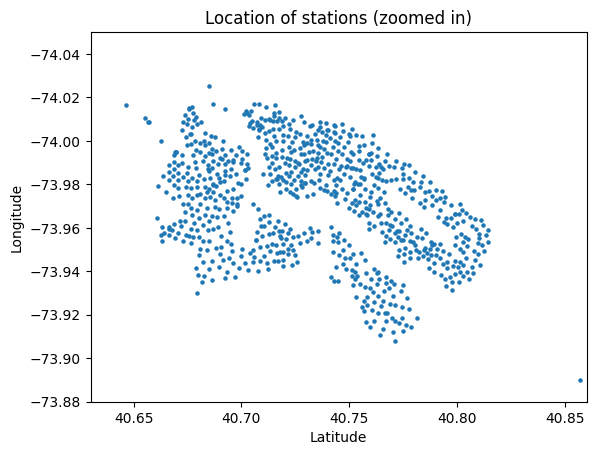

In [28]:
plt.scatter(data_clustering['latitude'], data_clustering['longitude'], s=5)
plt.xlim([40.63,40.86])
plt.ylim([-73.88,-74.05])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("Location of stations (zoomed in)")

The K-means clustering can now begin. 

In [22]:
from sklearn.cluster import KMeans

We fit 20 clusters based on the latitude and longitude, and assign the cluster to each point in the dataframe.

In [29]:
km=KMeans(20)
km.fit(data_clustering[['latitude', 'longitude']])
data_clustering['cluster'] = km.labels_

/opt/anaconda3/envs/IBA_42577/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=20)

We can now plot the points again, only this time we can color them based on their clustering. 

Text(0.5, 1.0, 'Location of stations (zoomed in)')

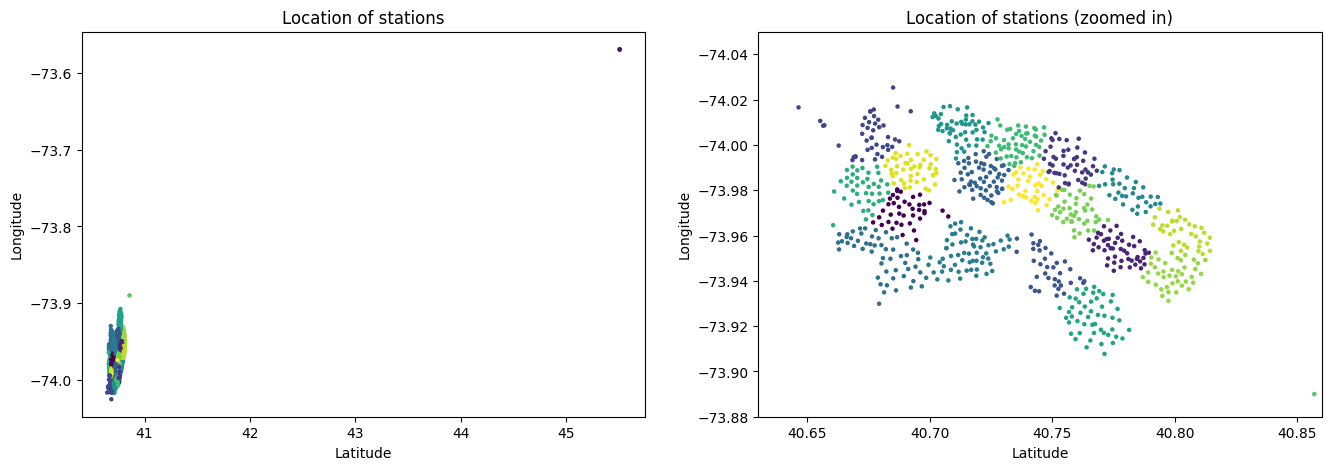

In [37]:
plt.figure(figsize=(16, 5))

plt.subplot(121)
plt.scatter(data_clustering['latitude'], data_clustering['longitude'], s=5, c=data_clustering['cluster'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("Location of stations")

plt.subplot(122)
plt.scatter(data_clustering['latitude'], data_clustering['longitude'], s=5, c=data_clustering['cluster'])
plt.xlim([40.63,40.86])
plt.ylim([-73.88,-74.05])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("Location of stations (zoomed in)")

In [55]:
# Creating a dictionary which will help with translating the station ids to their cluster values in the original dataframe
station_to_cluster_dict = {row['station_id']: row['cluster'] for _, row in data_clustering.iterrows()}

In [58]:
data_outliers_removed['start_cluster'] = data_outliers_removed['start_station_id'].map(station_to_cluster_dict)
data_outliers_removed['end_cluster'] = data_outliers_removed['end_station_id'].map(station_to_cluster_dict)

/var/folders/xq/4pwj6w6x1rx8l3hmyx653y200000gn/T/ipykernel_73176/3182729548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_outliers_removed['start_cluster'] = data_outliers_removed['start_station_id'].map(station_to_cluster_dict)
/var/folders/xq/4pwj6w6x1rx8l3hmyx653y200000gn/T/ipykernel_73176/3182729548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_outliers_removed['end_cluster'] = data_outliers_removed['end_station_id'].map(station_to_cluster_dict)


In [59]:
data_outliers_removed

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,start_cluster,end_cluster
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,3.0,3.0
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,3.0,3.0
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,3.0,3.0
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,3.0,3.0
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,3.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548334,734,2018-12-31 23:55:06.9910,2019-01-01 00:07:21.2300,336.0,40.730477,-73.999061,379.0,40.749156,-73.991600,27111,Subscriber,1986,1,13.0,3.0
17548335,2551,2018-12-31 23:55:44.3070,2019-01-01 00:38:15.7820,3320.0,40.794067,-73.962868,2006.0,40.765909,-73.976342,16390,Customer,1969,0,17.0,15.0
17548336,2376,2018-12-31 23:56:52.8500,2019-01-01 00:36:29.2860,427.0,40.701907,-74.013942,259.0,40.701221,-74.012342,34398,Subscriber,1979,1,10.0,10.0
17548337,2758,2018-12-31 23:58:29.2120,2019-01-01 00:44:27.5170,3320.0,40.794067,-73.962868,281.0,40.764397,-73.973715,30818,Customer,1969,0,17.0,15.0


Based on the start and end clusters, we can now tell how often bikes move from cluster to cluster. 
#### TODO: we could also do analysis of which clusters are used moreso to travel within a cluster compared to from cluster to cluster

In [81]:
print(f"""Amount of trips starting and ending in the same cluster: {len(data_outliers_removed[data_outliers_removed['start_cluster'] == data_outliers_removed['end_cluster']])}
Amount of trips starting and ending in different clusters: {len(data_outliers_removed[data_outliers_removed['start_cluster'] != data_outliers_removed['end_cluster']])}""")

Amount of trips starting and ending in the same cluster: 6903323
Amount of trips starting and ending in different clusters: 10469487



2. You are expected to build a prediction model that, at the end of a day, allows to
predict what the demand for a cluster of stations will be over the next 24 hours – i.e.
not the total demand for the next day, but how the time-series of the demand will look like for the next day (e.g., given demand data until midnight of day 1, predict the number of pickups for all 1h intervals [6-7am, 7-8am, ..., 11-12pm] in day 2). You should predict both the arrivals (i.e., bicycle dropoffs) and the departures (pickups). You should use a time aggregation of one hour or less. You can choose to use two
different models or a single one to predict both. It is up to you to decide how to best formulate this problem as a machine learning problem. You should not shuffle the
data. You should instead use the data from January to October (included) to train your model, and the data from November and December as a test set. As a reference, good model should be able to predict the test set with an R2 of at least 0.60. You can use any sklearn regression model you want.

3. Overnight, the bike-sharing company manually repositions their bikes in order to ensure that the demand for the next day can be satisfied. You are expected to use the outputs from the prediction model above to compute the required number of bicycles to be placed in each cluster of stations analyzed in Task 2 at the beginning of the next day. To compute this number, you can use the cumulative of the arrivals and departures. The goal is to ensure that, over the duration of the next day, there will never be a shortage of bikes – or, if there is, the goal is to minimize the number of bikes in deficit. The number of bicycles required can be extrapolated as the maximum difference between departures and arrivals.